<a href="https://colab.research.google.com/github/cinsimoes/gz-dbt-repository/blob/main/My_first_Regression_Challenge_Cintia_Simoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

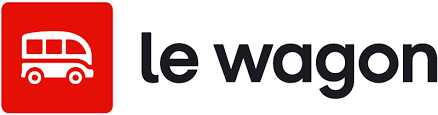

#The dataset 🏀

The dataset contains statistics of **4000** NBA players, including:

- `season`: The season (yearly) the player played in
- `poss`: Possessions played
- `mp`: Minutes played
- `do_ratio`: A player’s ratio of time spent in defense vs. offense; negative values mean more defense positioning
- `pacing`: Player impact on team possessions per 48 minutes
- `win_rating`: Wins Above Replacement rating, how many additional wins a player is worth over a same-level replacement

# Predicting Win Ratings in the NBA

You're finally ready to try out **your first ML model**! 🔥


Your first regression task of this week is to **predict** the Win Rating of NBA players based on their characteristics.


Why is this a regression task?



<details>
    <summary>Answer 💡</summary>
    
Because the Win rating is a continuous feature, as it's on a scale!
</details>


## Import the data




The dataset is available at this link: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv).


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
You can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
</details>


In [1]:
import pandas as pd

nba = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv')

In [2]:
nba.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      4000 non-null   int64  
 1   poss        4000 non-null   int64  
 2   mp          4000 non-null   int64  
 3   do_ratio    4000 non-null   float64
 4   pacing      4000 non-null   float64
 5   win_rating  4000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 187.6 KB


Do you see the **features and target**?

Target: Win predictability // Features: poss, mp, do_ratio, pacing


## Simple modelling


### Define X and y


We first need to define our features (X) and our target (y).


Let's start off with a simple example - let `X` be **the number of minutes** a player has played.

You can figure out what `y` should be from the task we are trying to achieve!


In [7]:
X = nba[['mp']]
y = nba['win_rating']


### Train test split


Another critical step Machine Learning is the **train, test, split**. \
This is especially important to avoid [data leakage](https://datascientest.com/en/data-leakage-definition-and-prevention).

Use Sklearn `train_test_split`function to create **4 variables** `X_train`, `X_test`, `y_train`, `y_test`. \
Have a look at the lecture if you are unsure about the syntax.




- Use `random_state=0` to compare your final results with your buddy's results.




In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


### Scaling the features



We need to scale our numerical feature.

Import and instantiate a scaler of your choice from the **Sklearn** library. Then :

1. Fit and transform `X_train` and load the results in a `X_train_scaled`variable
2. Transform `X_test` and load the results in a `X_test_scaled` variable


⚠️  **IMPORTANT!  NEVER** fit the test dataset.


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[0.15644028],
       [0.35948478],
       [0.31451991],
       ...,
       [0.03723653],
       [0.06370023],
       [0.35105386]])

### Modelling


Here come the exciting part!


**Linear Regression** is the fundamental regression model in Machine Learning!

For now, you don't need to understand the specifics of how it works, just know that it can do regression tasks very easily!

Import, instantiate and fit a **LinearRegression** model on the training data!

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
lin_reg.score(X_train_scaled, y_train)

0.5622370594427851

In [12]:
lin_reg.predict(X_test_scaled)

array([ 1.21603412e+00,  6.38068388e+00,  5.36222943e+00,  2.97635769e+00,
        3.52952838e+00,  7.22316352e-01,  1.37629853e+00,  1.83641247e+00,
       -5.67553633e-01,  3.15730137e+00,  9.93731880e-01, -1.49036643e+00,
        1.90103522e+00,  4.61777541e+00, -2.10836082e-01,  7.84354187e-01,
        7.00881696e+00,  5.49664474e+00, -1.22153581e+00,  3.55537748e+00,
        1.05576971e+00,  4.10854818e+00,  4.77545490e+00, -9.08761726e-01,
        2.54467775e+00,  2.78507436e+00, -6.03742371e-01,  3.15988628e+00,
        4.89694566e+00,  2.48263992e+00,  7.35039946e-02,  4.40064298e+00,
       -1.20085653e+00,  3.73632117e+00,  1.90362013e+00,  3.55020766e+00,
       -1.51621553e+00, -1.43608332e+00,  4.48594501e+00, -1.10779978e+00,
       -3.21987203e-01,  6.12736272e+00,  1.76900386e-01,  1.06869426e+00,
       -6.47685837e-01,  2.56535703e+00, -1.14915834e+00,  6.31089132e+00,
        4.61002068e+00,  5.79907918e+00,  1.15658120e+00,  5.24849340e+00,
       -1.19310180e+00, -

### Scoring

Let's evaluate the performance of our model. \
Score your fitted model on your **test dataset** and store the result in a variable named `single_score`.



You should obtain a score around 54%.


In [13]:
single_score = lin_reg.score(X_test_scaled, y_test)

In [14]:
single_score

0.5509456884683099

How can we interpret the score?

For now, bigger is better (the scale goes up to 1). We'll understand more in depth how to make sense of this when we study Linear Regressions in detail.


## A more complete features set

It's time to try the **Linear Regression** on all of the relevant features.

Create new `X` and `y` variables, using `poss`,`mp`,`do_ratio`and `pacing`as features this time.


In [15]:
X = nba[['poss', 'mp', 'do_ratio', 'pacing']]
y = nba['win_rating']

### Train test split


Split `X` and `y` as you did before. \
Remember to set `random_state=0` to compare your results with your buddy's.


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Scaling

Now it's time to scale the data, just like we did before!

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
print(X_train_scaled)
print(y)

[[0.1605178  0.15644028 0.5496945  0.24638758]
 [0.35512406 0.35948478 0.51996191 0.20545725]
 [0.30409924 0.31451991 0.49316636 0.20595837]
 ...
 [0.03300971 0.03723653 0.5017017  0.2193465 ]
 [0.0613808  0.06370023 0.48759552 0.18501834]
 [0.33182309 0.35105386 0.52317295 0.19282918]]
0        1.643091
1       10.808427
2        3.054773
3        0.230004
4        0.905614
          ...    
3995     0.082828
3996     3.542416
3997     0.787185
3998    -0.312601
3999     5.380485
Name: win_rating, Length: 4000, dtype: float64


### A new model

Because we have a new set of features, we need to train a new model!

Instantiate and train a second model on with your new features.


In [24]:
X_test_scaled

array([[0.23570658, 0.24777518, 0.50301606, 0.16576759],
       [0.75717368, 0.71569087, 0.61096691, 0.19086047],
       [0.56450917, 0.6234192 , 0.51604751, 0.19450589],
       ...,
       [0.54023732, 0.62318501, 0.51726032, 0.20561308],
       [0.47788565, 0.49297424, 0.53185731, 0.1988547 ],
       [0.24552319, 0.27962529, 0.51900926, 0.18752948]])

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

Score your new fitted model, and store the results in a variable named `multiple_score`.


In [26]:
multiple_score = lin_reg.score(X_test_scaled, y_test)

In [27]:
multiple_score

0.6446947826843757

Compare `single_score`and `multiple_score`.

In [28]:
print(f"Single feature model score: {single_score}")
print(f"Multiple feature model score: {multiple_score}")

Single feature model score: 0.5509456884683099
Multiple feature model score: 0.6446947826843757


> **We can observe a substantial increase of the score when we train a model on many features instead of just one.**


## A new player arrives!

These are his stats:

- poss: 4902
- mp: 1845
- do_ratio: 1.011
- pacing: 0.381

Create a single row DataFrame for this new player!

In [31]:
player_data = {
    'poss': [4902],
    'mp': [1845],
    'do_ratio': [1.011],
    'pacing': [0.381]
  }

# Create a single-row DataFrame
new_player_df = pd.DataFrame(player_data)

print(new_player_df)

   poss    mp  do_ratio  pacing
0  4902  1845     1.011   0.381


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

Predict the win rating for this new player!


In [35]:
# Scale the new player's data using the fitted scaler
new_player_scaled = scaler.transform(new_player_df)

# Predict the win rating for the new player
predicted_win_rating = lin_reg.predict(new_player_scaled)

print(f"Predicted Win Rating for the new player: {predicted_win_rating[0]}")

Predicted Win Rating for the new player: 3.3496832521722624


## What is going on?

That's an astronomical win rating! Did'nt we forget to do something?

We did... can you figure out what we forgot to do and fix the issue? \
Once you have, you can go on with the prediction!

In [ ]:
#your code here

**Congratulations on training your first regression model!** 🎉

